In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'top_imdb_movies.csv'
df = pd.read_csv(file_path)
df

,Name,Year,Duration,ratings,Num_of_Ratings,Genres
0,The Shawshank Redemption,1994,2h 22m,9.3,2900000,Drama
1,The Godfather,1972,2h 55m,9.2,2000000,"Crime,Drama"
2,The Dark Knight,2008,2h 32m,9.0,2900000,"Action,Crime,Drama"
3,The Lord of the Rings: The Return of the King,2003,3h 21m,9.0,2000000,"Action,Adventure,Drama"
4,The Godfather Part II,1974,3h 22m,9.0,1400000,"Crime,Drama"
...,...,...,...,...,...,...
245,To Be or Not to Be,1942,1h 39m,8.1,43000,"Comedy,Romance,War"
246,The Incredibles,2004,1h 55m,8.0,807000,"Animation,Action,Adventure"
247,Groundhog Day,1993,1h 41m,8.0,684000,"Comedy,Drama,Fantasy"
248,Aladdin,1992,1h 30m,8.0,466000,"Animation,Adventure,Comedy"


In [3]:
file_path = 'top_imdb_movies.csv'
df = pd.read_csv(file_path)

def convert_duration_to_minutes(duration):
    match = re.match(r"(\d+)h (\d+)m", duration)
    if match:
        hours = int(match.group(1))
        minutes = int(match.group(2))
        return hours * 60 + minutes
    return None

df['Duration_Minutes'] = df['Duration'].apply(convert_duration_to_minutes)
df.head()

,Name,Year,Duration,ratings,Num_of_Ratings,Genres,Duration_Minutes
0,The Shawshank Redemption,1994,2h 22m,9.3,2900000,Drama,142.0
1,The Godfather,1972,2h 55m,9.2,2000000,"Crime,Drama",175.0
2,The Dark Knight,2008,2h 32m,9.0,2900000,"Action,Crime,Drama",152.0
3,The Lord of the Rings: The Return of the King,2003,3h 21m,9.0,2000000,"Action,Adventure,Drama",201.0
4,The Godfather Part II,1974,3h 22m,9.0,1400000,"Crime,Drama",202.0


In [4]:
df.describe()

,Year,ratings,Num_of_Ratings,Duration_Minutes
count,250.00000,250.000000,2.500000e+02,243.000000
mean,1987.49600,8.310800,6.950640e+05,130.008230
std,25.45257,0.236447,5.578175e+05,29.484411
min,1921.00000,8.000000,4.300000e+04,68.000000
25%,1968.75000,8.100000,2.362500e+05,108.500000
50%,1995.00000,8.200000,5.660000e+05,128.000000
75%,2007.00000,8.400000,9.967500e+05,146.500000
max,2024.00000,9.300000,2.900000e+06,238.000000


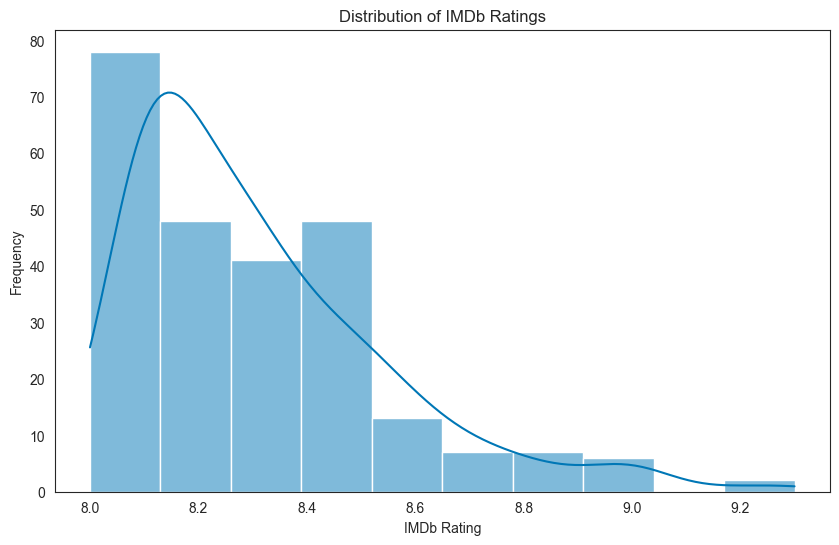

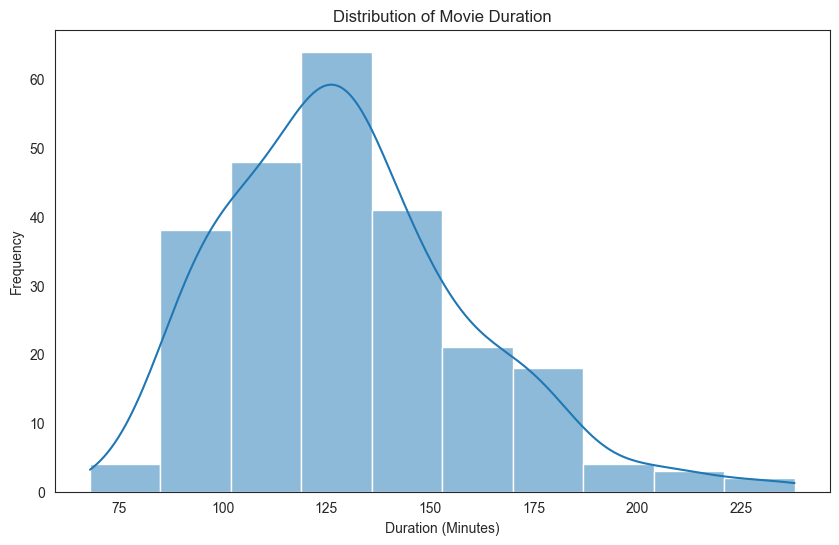

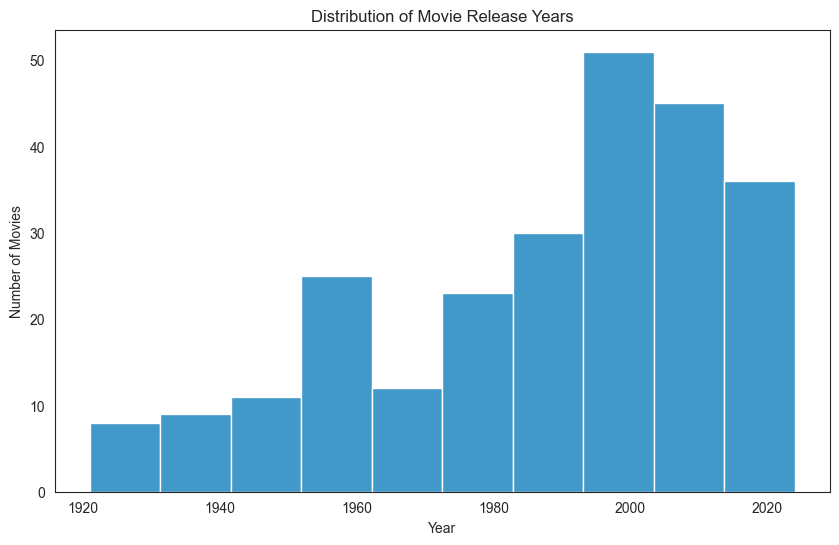

In [5]:
# Histogram of IMDb Ratings
colors = ['#03045e','#023e8a','#0077b6','#0096c7','#00b4d8','#48cae4','#90e0ef','#ade8f4']
plt.figure(figsize=(10, 6))
sns.histplot(df['ratings'], bins=10, kde=True, color=colors[2])
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

# Histogram of Movie Duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration_Minutes'], bins=10, kde=True, palette=colors[2])
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

# Histogram of Release Years
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], bins=10, kde=False, color=colors[2])
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

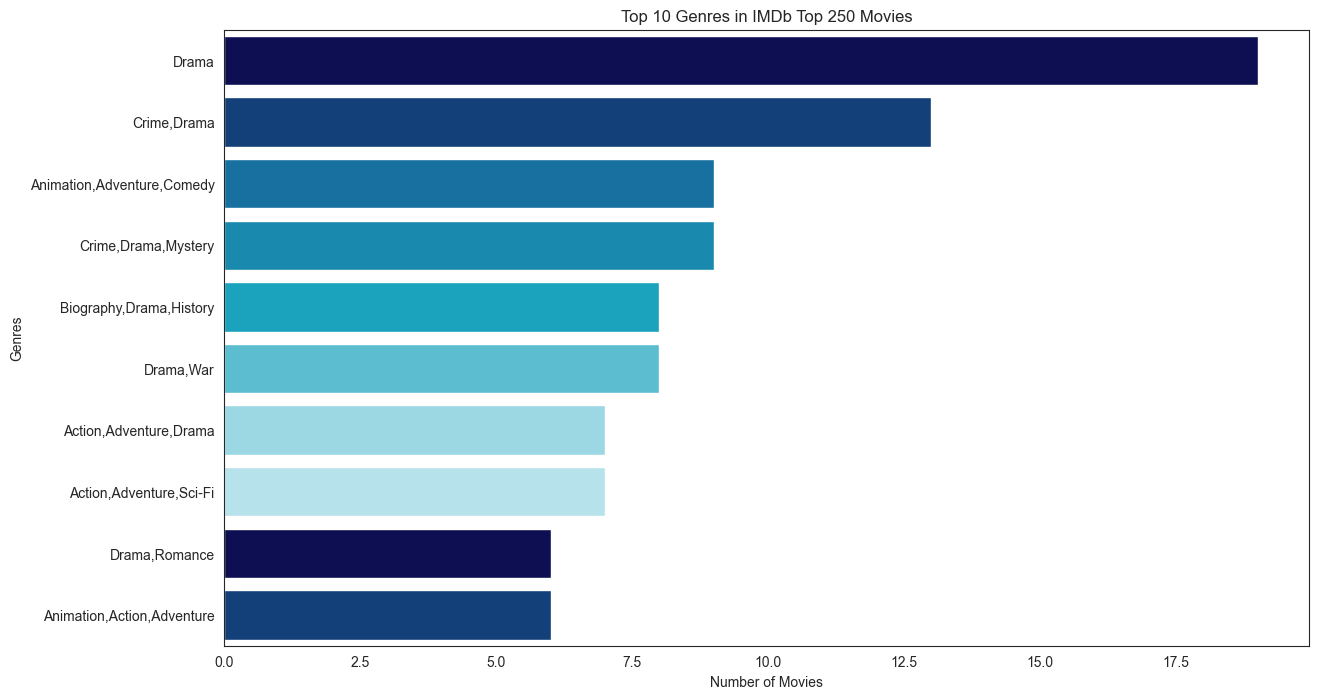

In [6]:
# Bar Chart for Top 10 Genres
plt.figure(figsize=(14, 8))
top_genres = df['Genres'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette=colors)
plt.title('Top 10 Genres in IMDb Top 250 Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

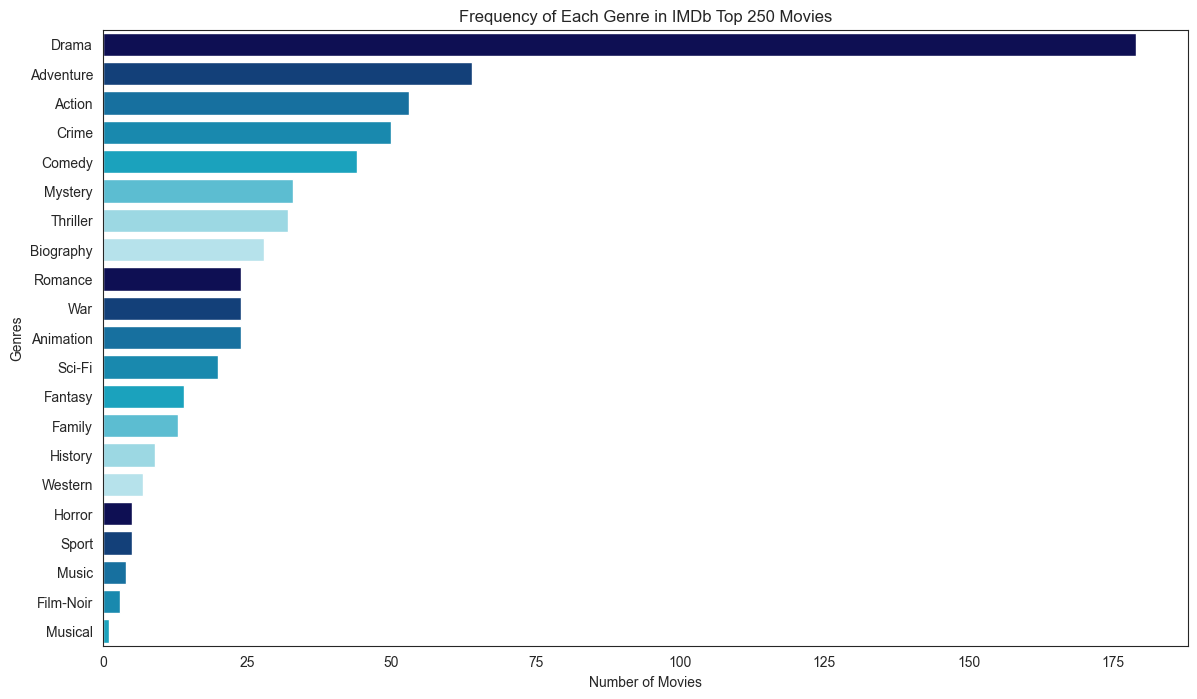

In [12]:
# df['Genres'] = df['Genres'].str.split(',')

# # Explode the genres into separate rows
# df_exploded = df.explode('Genres')

# Count the frequency of each genre
genre_counts = df_exploded['Genres'].value_counts()

# Plotting the bar chart for genre frequency
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette= colors)
plt.title('Frequency of Each Genre in IMDb Top 250 Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.savefig('genre_freq.png', dpi=300, bbox_inches='tight')
plt.show()

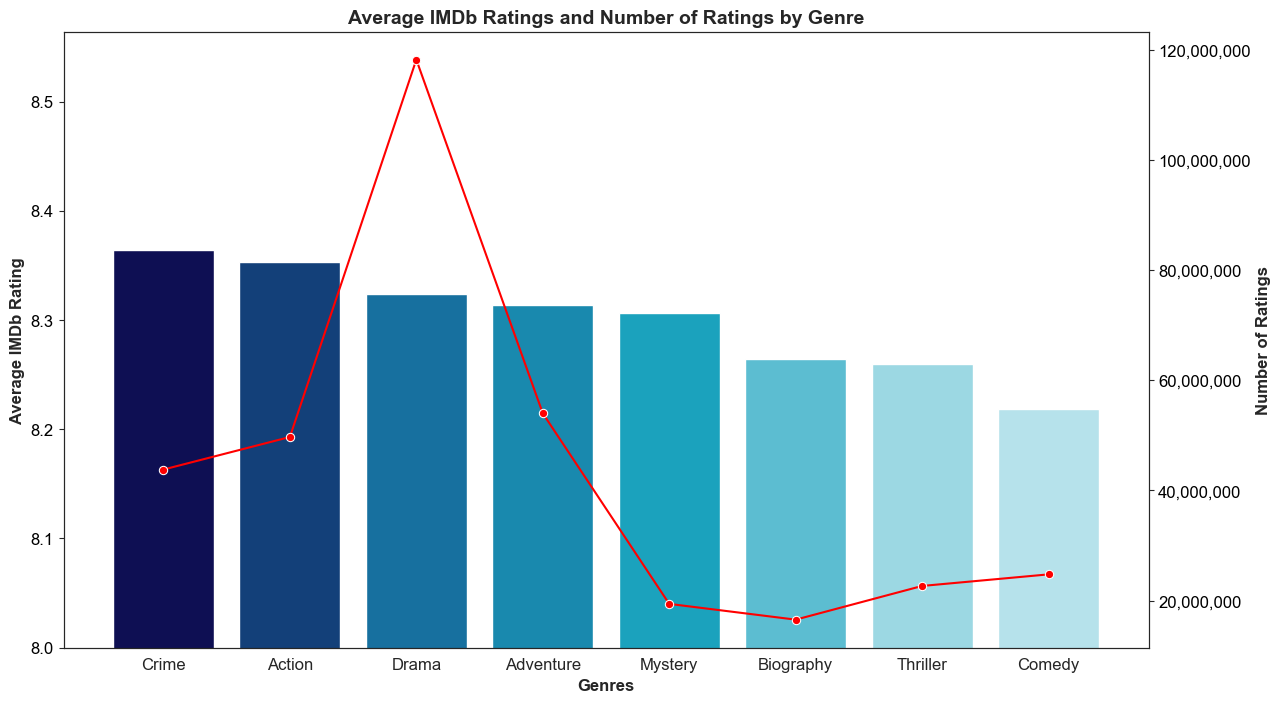

In [10]:
# Filter and calculate genre statistics as before
genre_counts = df_exploded['Genres'].value_counts()

threshold = 25
frequent_genres = genre_counts[genre_counts >= threshold].index

# Filter the dataset to keep only frequent genres
df_filtered = df_exploded[df_exploded['Genres'].isin(frequent_genres)]

# Group by Genres and calculate the average rating and total number of ratings for each genre
genre_stats = df_filtered.groupby('Genres').agg({'ratings': 'mean', 'Num_of_Ratings': 'sum'}).sort_values(by='ratings', ascending=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for average IMDb ratings
sns.barplot(x=genre_stats.index, y=genre_stats['ratings'], ax=ax1, palette=colors)
ax1.set_ylabel('Average IMDb Rating', fontweight='bold', fontsize=12)
ax1.set_ylim(8, genre_stats['ratings'].max() + 0.2)  # Starting from 8
ax1.tick_params(axis='y', labelcolor='black', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Line plot for the number of ratings
ax2 = ax1.twinx()  # Instantiate a second y-axis that shares the same x-axis
sns.lineplot(x=genre_stats.index, y=genre_stats['Num_of_Ratings'], ax=ax2, color='r', marker='o')
ax2.set_ylabel('Number of Ratings', fontweight='bold', fontsize=12)
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

# Ensure the full number is displayed without scientific notation
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Adding titles and layout adjustments
plt.title('Average IMDb Ratings and Number of Ratings by Genre', fontweight='bold', fontsize=14)
ax1.set_xlabel('Genres', fontweight='bold', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.savefig('avg_ratings.png', dpi=300, bbox_inches='tight')
plt.show()

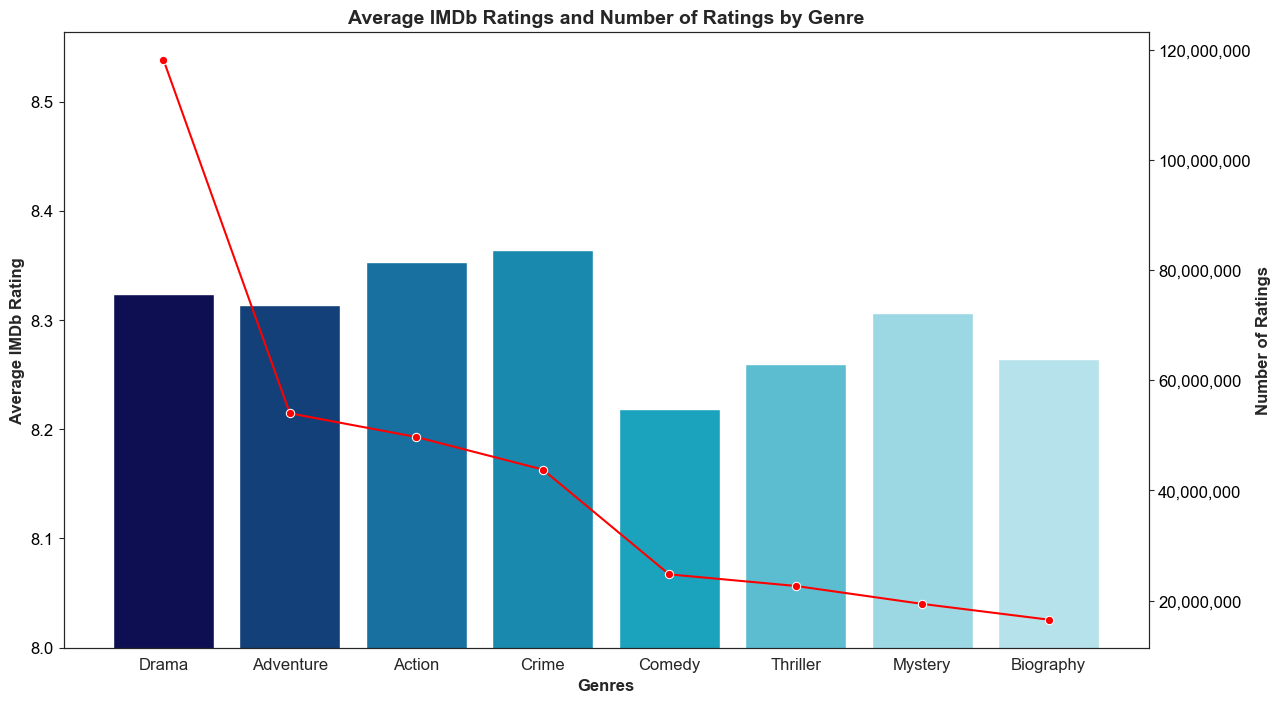

In [11]:
# Filter and calculate genre statistics as before
genre_counts = df_exploded['Genres'].value_counts()

threshold = 25
frequent_genres = genre_counts[genre_counts >= threshold].index

# Filter the dataset to keep only frequent genres
df_filtered = df_exploded[df_exploded['Genres'].isin(frequent_genres)]

# Group by Genres and calculate the average rating and total number of ratings for each genre
genre_stats = df_filtered.groupby('Genres').agg({'ratings': 'mean', 'Num_of_Ratings': 'sum'}).sort_values(by='Num_of_Ratings', ascending=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for average IMDb ratings
sns.barplot(x=genre_stats.index, y=genre_stats['ratings'], ax=ax1, palette=colors)
ax1.set_ylabel('Average IMDb Rating', fontweight='bold', fontsize=12)
ax1.set_ylim(8, genre_stats['ratings'].max() + 0.2)  # Starting from 8
ax1.tick_params(axis='y', labelcolor='black', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Line plot for the number of ratings
ax2 = ax1.twinx()  # Instantiate a second y-axis that shares the same x-axis
sns.lineplot(x=genre_stats.index, y=genre_stats['Num_of_Ratings'], ax=ax2, color='r', marker='o')
ax2.set_ylabel('Number of Ratings', fontweight='bold', fontsize=12)
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

# Ensure the full number is displayed without scientific notation
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Adding titles and layout adjustments
plt.title('Average IMDb Ratings and Number of Ratings by Genre', fontweight='bold', fontsize=14)
ax1.set_xlabel('Genres', fontweight='bold', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.savefig('avg_ratings-2.png', dpi=300, bbox_inches='tight')
plt.show()